## Numpy

In [102]:
import numpy as np

## Получить датасет [**Ирис**]

Ирис датасет получал напрямую с приложеного сайта. Изменил таргет на численный для экспорта в `np.array`

In [103]:
data = np.loadtxt('data.csv', delimiter=',')
data

array([[5.1, 3.5, 1.4, 0.2, 0. ],
       [4.9, 3. , 1.4, 0.2, 0. ],
       [4.7, 3.2, 1.3, 0.2, 0. ],
       [4.6, 3.1, 1.5, 0.2, 0. ],
       [5. , 3.6, 1.4, 0.2, 0. ],
       [5.4, 3.9, 1.7, 0.4, 0. ],
       [4.6, 3.4, 1.4, 0.3, 0. ],
       [5. , 3.4, 1.5, 0.2, 0. ],
       [4.4, 2.9, 1.4, 0.2, 0. ],
       [4.9, 3.1, 1.5, 0.1, 0. ],
       [5.4, 3.7, 1.5, 0.2, 0. ],
       [4.8, 3.4, 1.6, 0.2, 0. ],
       [4.8, 3. , 1.4, 0.1, 0. ],
       [4.3, 3. , 1.1, 0.1, 0. ],
       [5.8, 4. , 1.2, 0.2, 0. ],
       [5.7, 4.4, 1.5, 0.4, 0. ],
       [5.4, 3.9, 1.3, 0.4, 0. ],
       [5.1, 3.5, 1.4, 0.3, 0. ],
       [5.7, 3.8, 1.7, 0.3, 0. ],
       [5.1, 3.8, 1.5, 0.3, 0. ],
       [5.4, 3.4, 1.7, 0.2, 0. ],
       [5.1, 3.7, 1.5, 0.4, 0. ],
       [4.6, 3.6, 1. , 0.2, 0. ],
       [5.1, 3.3, 1.7, 0.5, 0. ],
       [4.8, 3.4, 1.9, 0.2, 0. ],
       [5. , 3. , 1.6, 0.2, 0. ],
       [5. , 3.4, 1.6, 0.4, 0. ],
       [5.2, 3.5, 1.5, 0.2, 0. ],
       [5.2, 3.4, 1.4, 0.2, 0. ],
       [4.7, 3

## Представить датасет одномерный/двумерный массивы

Разбил через слайс данные и таргет. Размерность совпадает с ожидаемой.

In [104]:
X = data[:,:-1]
y = data[:,-1]
X, y

(array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
        [5

In [105]:
X.shape, y.shape

((150, 4), (150,))

## Отобразите сколько места он занимает.

In [106]:
X_size_bytes = X.size * X.itemsize
y_size_bytes = y.size * y.itemsize
print(f"X np.ndarray size in bytes: {X_size_bytes}")
print(f"X np.ndarray size in bytes: {y_size_bytes}")
print(f"Overall: {X_size_bytes + y_size_bytes} bytes")

X np.ndarray size in bytes: 4800
X np.ndarray size in bytes: 1200
Overall: 6000 bytes


Как и ожидалось, объем занимаемой памяти составляет 6000 = 150 (Количетсво объектов) * 5 (фичи + таргет) * 8 (float64) байт

## Нормализация данных на промежуток от 0 до 1 для каждой колонки

Применив формулу для `MinMaxScaling` получил смаштабированные данные

In [107]:
min_vals = np.min(X, axis=0)
max_vals = np.max(X, axis=0)
X = (X - min_vals) / (max_vals - min_vals)
X

array([[0.22222222, 0.625     , 0.06779661, 0.04166667],
       [0.16666667, 0.41666667, 0.06779661, 0.04166667],
       [0.11111111, 0.5       , 0.05084746, 0.04166667],
       [0.08333333, 0.45833333, 0.08474576, 0.04166667],
       [0.19444444, 0.66666667, 0.06779661, 0.04166667],
       [0.30555556, 0.79166667, 0.11864407, 0.125     ],
       [0.08333333, 0.58333333, 0.06779661, 0.08333333],
       [0.19444444, 0.58333333, 0.08474576, 0.04166667],
       [0.02777778, 0.375     , 0.06779661, 0.04166667],
       [0.16666667, 0.45833333, 0.08474576, 0.        ],
       [0.30555556, 0.70833333, 0.08474576, 0.04166667],
       [0.13888889, 0.58333333, 0.10169492, 0.04166667],
       [0.13888889, 0.41666667, 0.06779661, 0.        ],
       [0.        , 0.41666667, 0.01694915, 0.        ],
       [0.41666667, 0.83333333, 0.03389831, 0.04166667],
       [0.38888889, 1.        , 0.08474576, 0.125     ],
       [0.30555556, 0.79166667, 0.05084746, 0.125     ],
       [0.22222222, 0.625     ,

## Представление одного из признаков в виде категориальной переменной

С помощью квантилей numpy вычислил категории и заменил первый столбец

In [108]:
feature_column = X[:, 0]

q25 = np.percentile(feature_column, 25)
q75 = np.percentile(feature_column, 75)

categorical_feature = np.zeros_like(feature_column, dtype=int)
categorical_feature[(feature_column >= q25) & (feature_column < q75)] = 1
categorical_feature[feature_column >= q75] = 2

In [109]:
X[:, 0] = categorical_feature

In [110]:
X

array([[1.        , 0.625     , 0.06779661, 0.04166667],
       [0.        , 0.41666667, 0.06779661, 0.04166667],
       [0.        , 0.5       , 0.05084746, 0.04166667],
       [0.        , 0.45833333, 0.08474576, 0.04166667],
       [0.        , 0.66666667, 0.06779661, 0.04166667],
       [1.        , 0.79166667, 0.11864407, 0.125     ],
       [0.        , 0.58333333, 0.06779661, 0.08333333],
       [0.        , 0.58333333, 0.08474576, 0.04166667],
       [0.        , 0.375     , 0.06779661, 0.04166667],
       [0.        , 0.45833333, 0.08474576, 0.        ],
       [1.        , 0.70833333, 0.08474576, 0.04166667],
       [0.        , 0.58333333, 0.10169492, 0.04166667],
       [0.        , 0.41666667, 0.06779661, 0.        ],
       [0.        , 0.41666667, 0.01694915, 0.        ],
       [1.        , 0.83333333, 0.03389831, 0.04166667],
       [1.        , 1.        , 0.08474576, 0.125     ],
       [1.        , 0.79166667, 0.05084746, 0.125     ],
       [1.        , 0.625     ,

## Train-Test split

Тут я использовал `shuffle` для того, чтобы выбрать случайные индексы, затем слайсами получил нужные переменные `X_train`, `X_test`, `y_train`, `y_test`.

In [111]:
def train_test_split_custom(X, y, test_size=0.2, random_state=42):
    np.random.seed(random_state)

    indices = np.arange(X.shape[0])
    np.random.shuffle(indices)

    split_point = int((1 - test_size) * X.shape[0])

    train_indices = indices[:split_point]
    test_indices = indices[split_point:]

    X_train, X_test = X[train_indices], X[test_indices]
    y_train, y_test = y[train_indices], y[test_indices]

    return X_train, X_test, y_train, y_test


In [112]:
X_train, X_test, y_train, y_test = train_test_split_custom(X, y, test_size=0.2, random_state=42)

In [113]:
len(X_train), len(X_test)

(120, 30)

## Выбор метода классификации --- Случайный лес



Для классификации на этом датасете я выбрал модель случайного леса.

In [114]:
from sklearn.ensemble import RandomForestClassifier
rfclf = RandomForestClassifier()

## Обучение на тестовых данных

сделал `fit` модели

In [115]:
rfclf.fit(X_train, y_train)

RandomForestClassifier()

## Оценка результата

Тут я спредиктил значения и посчитал метрики `accuracy`, `weighted recall`, `weighted precision` и `weighted F1-score`.

In [116]:
y_test_pred = rfclf.predict(X_test)
y_test_prob = rfclf.predict_proba(X_test)

In [117]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
def show_metrics(y_true, y_pred):
    print(f"Accuracy: {accuracy_score(y_true, y_pred)}")
    print(f"Precision: {precision_score(y_true, y_pred, average='weighted')}")
    print(f"Recall: {recall_score(y_true, y_pred, average='weighted')}")
    print(f"F1-Score: {f1_score(y_true, y_pred, average='weighted')}")

In [118]:
show_metrics(y_test, y_test_pred)

Accuracy: 0.9333333333333333
Precision: 0.9435897435897436
Recall: 0.9333333333333333
F1-Score: 0.9330808080808081


## Вывод по первому эксперименту

В целом, метрики указывают на то, что модель Random Forest хорошо справляется с задачей классификации на датасете Iris. Высокие значения всех метрик свидетельствуют о том, что модель является надежной и точной в предсказании классов.

## Эксперименты

In [119]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

data = load_iris()
X, y = data.data, data.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Переделал замену фичи в функцию, чтобы ее можно было использовать в пайплайне.

In [120]:
from sklearn.base import BaseEstimator, TransformerMixin
class AddFeature(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        feature_column = X[:, 0]
        self.q25 = np.percentile(feature_column, 25)
        self.q75 = np.percentile(feature_column, 75)
        return self

    def transform(self, X, y=None):
        feature_column = X[:, 0]
        categorical_feature = np.zeros_like(feature_column, dtype=int)
        categorical_feature[(feature_column >= self.q25) & (feature_column < self.q75)] = 1
        categorical_feature[feature_column >= self.q75] = 2
        X_transformed = X
        X_transformed[:, 0] = categorical_feature
        return X_transformed

Сделал 8 пайплайнов.
* 1, 2 проверяют воздействие методов Scaling'а на модель.
* 3, 4 проверяют воздействие добавления фичи в модель.
* 5, 6, 7, 8 проверяют воздействие гиперпараметров `n_estimators` и `max_depth`

In [121]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler, StandardScaler

pipeline1 = Pipeline([
    ('scaler', MinMaxScaler()),
    ('classifier', RandomForestClassifier(random_state=42))
])

pipeline2 = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', RandomForestClassifier(random_state=42))
])

pipeline3 = Pipeline([
    ('scaler', MinMaxScaler()),
    ('add_feature', AddFeature()),
    ('classifier', RandomForestClassifier(random_state=42))
])

pipeline4 = Pipeline([
    ('scaler', StandardScaler()),
    ('add_feature', AddFeature()),
    ('classifier', RandomForestClassifier(random_state=42))
])

pipeline5 = Pipeline([
    ('classifier', RandomForestClassifier(n_estimators=5, random_state=42))
])

pipeline6 = Pipeline([
    ('classifier', RandomForestClassifier(max_depth=3, random_state=42))
])

pipeline7 = Pipeline([
    ('classifier', RandomForestClassifier(n_estimators=5, max_depth=3, random_state=42))
])

pipeline8 = Pipeline([
    ('classifier', RandomForestClassifier(n_estimators=5, max_depth=1, random_state=42))
])



In [122]:
pipeline1.fit(X_train, y_train)
pipeline2.fit(X_train, y_train)
pipeline3.fit(X_train, y_train)
pipeline4.fit(X_train, y_train)
pipeline5.fit(X_train, y_train)
pipeline6.fit(X_train, y_train)
pipeline7.fit(X_train, y_train)
pipeline8.fit(X_train, y_train)

Pipeline(steps=[('classifier',
                 RandomForestClassifier(max_depth=1, n_estimators=5,
                                        random_state=42))])

In [123]:
y_pred_exibit_1 = pipeline1.predict(X_test)
y_pred_exibit_2 = pipeline2.predict(X_test)
y_pred_exibit_3 = pipeline3.predict(X_test)
y_pred_exibit_4 = pipeline4.predict(X_test)
y_pred_exibit_5 = pipeline5.predict(X_test)
y_pred_exibit_6 = pipeline6.predict(X_test)
y_pred_exibit_7 = pipeline7.predict(X_test)
y_pred_exibit_8 = pipeline8.predict(X_test)

In [124]:
preds = [y_pred_exibit_1,
         y_pred_exibit_2,
         y_pred_exibit_3,
         y_pred_exibit_4,
         y_pred_exibit_5,
         y_pred_exibit_6,
         y_pred_exibit_7,
         y_pred_exibit_8]

In [125]:
for idx, pred in enumerate(preds):
  print(f"\npipeline {idx+1}")
  show_metrics(y_test, pred)


pipeline 1
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-Score: 1.0

pipeline 2
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-Score: 1.0

pipeline 3
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-Score: 1.0

pipeline 4
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-Score: 1.0

pipeline 5
Accuracy: 0.9666666666666667
Precision: 0.9700000000000001
Recall: 0.9666666666666667
F1-Score: 0.966750208855472

pipeline 6
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-Score: 1.0

pipeline 7
Accuracy: 0.9666666666666667
Precision: 0.9700000000000001
Recall: 0.9666666666666667
F1-Score: 0.966750208855472

pipeline 8
Accuracy: 0.6333333333333333
Precision: 0.4683333333333334
Recall: 0.6333333333333333
F1-Score: 0.5195402298850574


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


### Вывод

Эксперименты 1,2,3,4 показывают идеальные результаты с аккуратностью, полнотой, точностью и F1-метрикой равными 1.0. Это указывает на то, что модели в этих пайплайнах идеально классифицируют все примеры в тестовой выборке. В этих экспериментах проверялось воздействие различных scaler'ов и влияние модели на замену фичи категориальной. Как можно наблюдать, в нашем случае результаты не меняются от препроцессинга через Scaler или замену одной фичи через квантили.

В экспериментах 5,6,7,8 проверялось воздействие таких гиперпараметров как `n_estimators` и `max_depth` При условии того, что дерево может быть глубоким, параметр `n_estimators` сам по себе не играет большой роли. Аналогичная ситуация с гиперпараметром `max_depth`, который отображает максимальную глубину деревьев в ансамбле. При условии, что деревьем достаточно много (по умолчанию 100) мы имеем идеальный классификатор. При значениях `n_estimators` = 5 и `max_depth` = 3 все ещё имеем отличный классификатор с метриками, большими 0.96. Но при задании гиперпараметров `n_estimators` = 5 и `max_depth` = 1 имеем уменьшение всех метрик, что свидетельствует об ухудшении модели.

Итого:
* Сильное влияние на модель имеют гиперпараметры `n_estimators` и `max_depth`
* Слабое влияние на модель имеют препроцессинг данных (Scaling и замена фичи)

## Визуализация

Создаем функции для отображения графиков. Будем использовать PCA, t-sne. Расположим соответствующие методы горизонтально

In [126]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

def plot_pca(X, y, ax, title):
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X)

    scatter = ax.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', alpha=0.7)
    legend = ax.legend(*scatter.legend_elements(), title="Classes")
    ax.add_artist(legend)
    ax.set_title(f'PCA - {title}')

def plot_tsne(X, y, ax, title):
    tsne = TSNE(n_components=2, perplexity=min(30, X.shape[0] - 1), random_state=42)
    X_tsne = tsne.fit_transform(X)

    scatter = ax.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y, cmap='viridis', alpha=0.7)
    legend = ax.legend(*scatter.legend_elements(), title="Classes")
    ax.add_artist(legend)
    ax.set_title(f't-SNE - {title}')

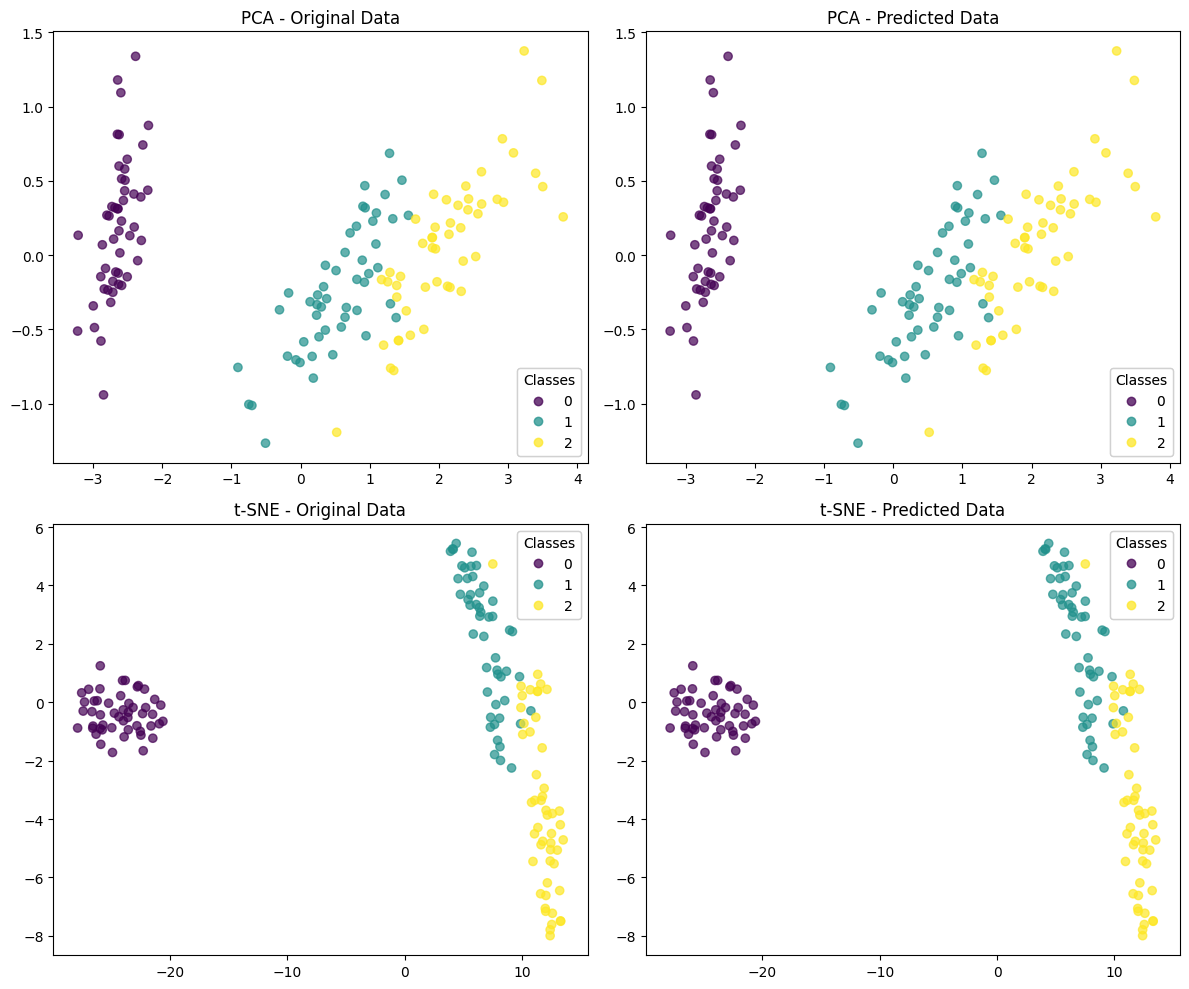

In [127]:
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

plot_pca(X, y, axes[0, 0], 'Original Data')
plot_tsne(X, y, axes[1, 0], 'Original Data')

plot_pca(X, pipeline1.predict(X), axes[0, 1], 'Predicted Data')
plot_tsne(X, pipeline1.predict(X), axes[1, 1], 'Predicted Data')

plt.tight_layout()
plt.show()
